In [7]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from matplotlib.colors import ListedColormap

import core
import data
import kermels

# TEST_PATH = 'labs/svm/resources/'
TEST_PATH = 'resources/'

C = 1

In [2]:
def classifier(x, w, b):
    value = np.sum(x * w) + b
    return 1 if value > 0 else -1

In [3]:
def cross_validation(X, Y, kermel_func):
    ids = np.arange(Y.size)
    np.random.shuffle(ids)
    ids_batchs = np.array_split(ids, 5)
    contingency_matrix = [[0] * 2 for _ in range(2)]

    for test_num in range(len(ids_batchs)):
      X_train, Y_train = data.train_dataset(X, Y, ids_batchs, test_num)
      w, b = core.SVM(X_train, Y_train, kermel_func).evaluate(C)

      X_test, Y_test = X[ids_batchs[test_num]], Y[ids_batchs[test_num]]
      for i in range(len(ids_batchs[test_num])):
          y_prediction = classifier(X_test[i], w, b)
          
          prediciton_index = 0 if y_prediction == -1 else 1
          actual_index = 0 if Y_test[i] == -1 else 1

          contingency_matrix[prediciton_index][actual_index] += 1

    f, _ = core.eval_f(contingency_matrix)
    return f

In [4]:
# linear kernel

X, Y = data.read_data(TEST_PATH + 'geyser.csv')
f = -1
for c in np.linspace(0,1,11):
    print("evaluating for C = " + str(c))
    curr_f = cross_validation(X, Y, kermels.linear_kernel(c))
    if (f < curr_f):
        f = curr_f
        best_const = c

print("best const = " + str(best_const))
print("cross validation result = " + str(f))

evaluating for C = 0.0


KeyboardInterrupt: 

In [ ]:
# polynomial kernel

X, Y = data.read_data(TEST_PATH + 'geyser.csv')
f = -1
for d in range(1, 3):
    print("evaluating for D = " + str(d))
    curr_f = cross_validation(X, Y, kermels.polynomial_kernel(d))
    if (f < curr_f):
        f = curr_f
        best_d = d

print("best const = " + str(best_d))
print("cross validation result = " + str(f))

In [ ]:
# gaussian kernel

X, Y = data.read_data(TEST_PATH + 'geyser.csv')
f = -1
for sigma in np.linspace(0.5,1,11):
    print("evaluating for sigma = " + str(sigma))
    curr_f = cross_validation(X, Y, kermels.gaussian_kernel(sigma))
    if (f < curr_f):
        f = curr_f
        best_sigma = sigma

print("best const = " + str(sigma))
print("cross validation result = " + str(f))

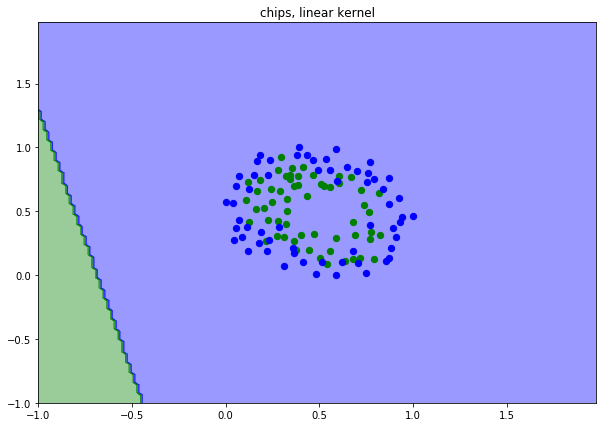

In [ ]:
def plot_decision(x, y, w, b, title, idx=[], resolution=0.02):
    plt.rcParams['figure.figsize'] = [10, 7]
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    classes = np.array(list(map(lambda x: classifier(x, w, b), np.c_[xx1.ravel(), xx2.ravel()])))
    classes = classes.reshape(xx1.shape)

    plt.contourf(xx1, xx2, classes, alpha=0.4, cmap=cmap)

    for elem_x, elem_y in zip(x, y):
        if elem_y == -1:
            plt.scatter(elem_x[0], elem_x[1], s=40, color=colors[0])
        else:
            plt.scatter(elem_x[0], elem_x[1], s = 40, color=colors[1])
    plt.title(title)
    plt.show()

X, Y = data.read_data(TEST_PATH + 'chips.csv')
w, b = core.SVM(X, Y, kermels.linear_kernel(0.7)).evaluate(C)
plot_decision(X, Y, w, b, "chips, linear kernel")

X, Y = data.read_data(TEST_PATH + 'geyser.csv')
w, b = core.SVM(X, Y, kermels.linear_kernel(0.7)).evaluate(C)
plot_decision(X, Y, w, b, "geyser, linear kernel")

X, Y = data.read_data(TEST_PATH + 'chips.csv')
w, b = core.SVM(X, Y, kermels.polynomial_kernel(2)).evaluate(C)
plot_decision(X, Y, w, b, "chips, polynomial kernel")

X, Y = data.read_data(TEST_PATH + 'geyser.csv')
w, b = core.SVM(X, Y, kermels.polynomial_kernel(2)).evaluate(C)
plot_decision(X, Y, w, b, "geyser, polynomial kernel")

X, Y = data.read_data(TEST_PATH + 'chips.csv')
w, b = core.SVM(X, Y, kermels.gaussian_kernel(0.1)).evaluate(C)
plot_decision(X, Y, w, b, "chips, gaussian kernel")

X, Y = data.read_data(TEST_PATH + 'geyser.csv')
w, b = core.SVM(X, Y, kermels.gaussian_kernel(0.1)).evaluate(C)
plot_decision(X, Y, w, b, "geyser, gaussian kernel")